In [1]:
import run_simulation as rs
import numpy as np	
import matplotlib.pyplot as plt

c:\Program Files\Python310\lib\site-packages\cupyx\jit\_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
rs.check_system()

GPU is available
GPU:  b'NVIDIA GeForce RTX 4060 Laptop GPU'


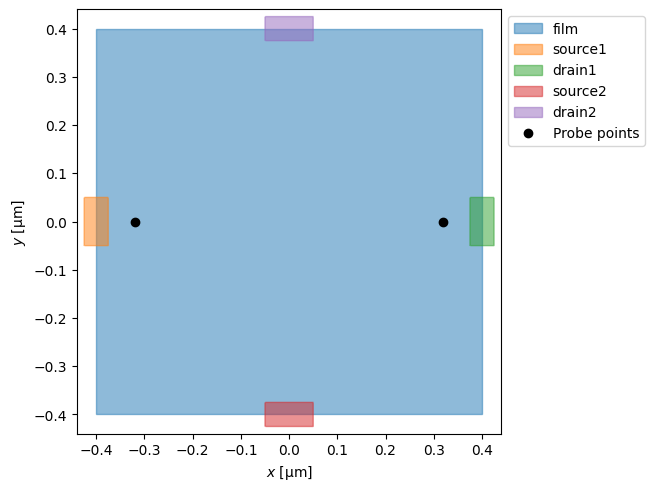

In [3]:
xi=0.1
sizes=[0.8]



devices_list=[]

for size in sizes:
	devices_list.append(rs.define_4_terminal_mesh(size,size,xi=xi, probes=[((-size*(0.4),0),
					   				(size*(0.4),0),
									)]))

fig,ax=devices_list[-1].draw()

In [4]:
for device in devices_list:
	rs.build_mesh(device,max_edge_L=xi/4,plot=False)

Constructing Voronoi polygons: 100%|██████████| 3944/3944 [00:01<00:00, 2191.47it/s]

num_sites: 3944
num_elements: 7486
min_edge_length: 0.005030606216198351
max_edge_length: 0.0256909190920232
mean_edge_length: 0.013782078122297928
min_area: 1.3987163596122863e-05
max_area: 0.00035275310969192143
mean_area: 0.0001622718052738337
coherence_length: 0.1
length_units: um


In [5]:
solutions_list=[]
currents_list=[]

for device in devices_list:
	print("--------------------------------------------------------------------------------")
	solutions,currents=rs.current_series(device,0,30,20,10,solve_time=100)
	solutions_list.append(solutions)
	currents_list.append(currents)



--------------------------------------------------------------------------------


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.32tau/s ]


1/20 done


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.57tau/s ]


2/20 done


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.47tau/s ]


3/20 done


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.49tau/s ]


4/20 done


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.30tau/s ]


5/20 done


Simulating: 100%|█████████▉| 200/200 [00:34<00:00,  5.79tau/s ]


6/20 done


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.60tau/s ]


7/20 done


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.43tau/s ]


8/20 done


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.27tau/s ]


9/20 done


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.85tau/s ]


10/20 done


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.23tau/s ]


11/20 done


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.23tau/s ]


12/20 done


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.79tau/s ]


13/20 done


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.66tau/s ]


14/20 done


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.93tau/s ]


15/20 done


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.96tau/s ]


16/20 done


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.99tau/s ]


17/20 done


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.63tau/s ]


18/20 done


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.09tau/s ]


19/20 done


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.19tau/s ]


20/20 done


-1.1759297669091552e-06
0.08439707899221946
0.17403273868008232
0.2917305790589718
0.46268985485539504
0.5957591913368324
1.5523496786371
1.9656621515170172
2.3197974913726345
2.6473531548543066
2.968388231912633
3.2871511730776954
3.604235263512149
3.920164466983831
4.235143345336578
4.54943380610936
4.863084407572419
5.176192989233618
5.488898436286324
5.801174715559488


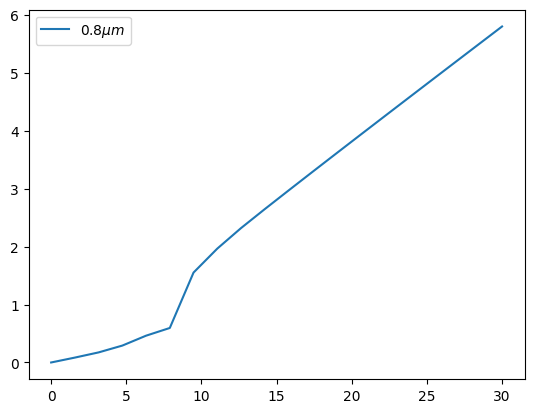

In [6]:

jj=0
voltages_for_squares=[]
for solutions in solutions_list:
	ii=0
	voltages_list=[]
	voltage_values=np.zeros(len(solutions))
	for solution in solutions:
		voltages_list.append(solution.dynamics.voltage())
		max_idx=voltages_list[ii].shape[0]-1
		voltage_values[ii]=np.mean(voltages_list[ii][max_idx-5000:max_idx])
		print(voltage_values[ii])

		ii+=1
	voltages_for_squares.append(voltages_list)


	plt.plot(currents_list[jj],voltage_values, label=f'{sizes[jj]}$\mu m$')
	jj+=1

plt.legend()
# plt.xlim(0,6)
# plt.ylim(0,1)



C:\Users\cordo\AppData\Local\Temp\ipykernel_9256\3276978076.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(currents))


Text(0, 0.5, 'Voltaje ($V_0$)')

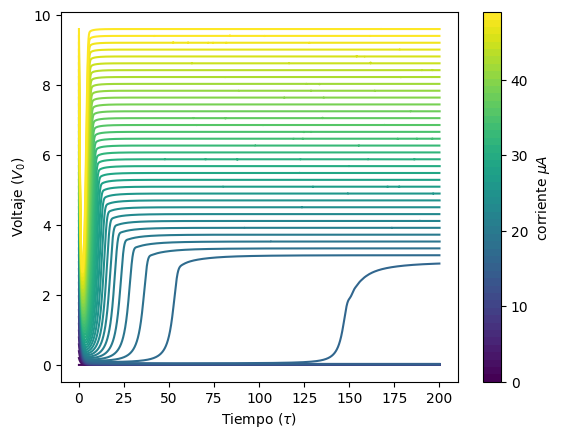

In [7]:
import matplotlib.cm as cm
colors=['r','g','b','k']
fig, ax = plt.subplots()

cmap = cm.get_cmap('viridis', len(currents))
norm = plt.Normalize(0, len(currents) - 1)
jj=0

for solutions in solutions_list:
	ii=0
	if jj>=1:
		break
	voltages_list=[]
	for solution in solutions:
		solution.dynamics.voltage()
		
		ii+=1





		ax.plot(solution.dynamics.time,solution.dynamics.voltage(),color=cmap(norm(ii)))
	jj+=1

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', label='corriente $\mu A$')
ax.set_xlabel(r'Tiempo ($\tau$)')
ax.set_ylabel('Voltaje ($V_0$)')
